<h1><center>Imports</center></h1>

In [3]:
import tensorflow as tf
print('tf.__version__:', tf.__version__)
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
import cv2

tf.__version__: 2.0.0


<h1><center>Functions</center></h1>

In [4]:
def load_data(file):
    '''
    loads h5py file
    '''
    # Open the file as readonly
    h5f = h5py.File('prepare_data.h5', 'r')

    # Load the training, test and validation set
    X_train = h5f['X_train'][:]
    y_train = h5f['y_train'][:]
    X_val = h5f['X_val'][:]
    y_val = h5f['y_val'][:]
    X_test = h5f['X_test'][:]
    y_test = h5f['y_test'][:]

    # Close this file
    h5f.close()
    return(X_train, y_train, X_val, y_val, X_test, y_test)

In [5]:
def read_data_labels(file):
    '''
    prints the labels of a h5py file
    '''
    # Open the file as readonly
    h5f = h5py.File('prepare_data.h5', 'r')
    
    print('labels:', list(h5f.keys()))

    # Close this file
    h5f.close()

In [6]:
def create_model():
    '''
    Creates a VGG16 model
    '''
    vgg16_model = keras.applications.vgg16.VGG16()
    
    model = Sequential()
    for layer in vgg16_model.layers[:-1]: # remove last "Dense" layer that classifies 1/1000
        model.add(layer)
    
    # freezes all layers
    for layer in model.layers:
        layer.trainable = False
    
    # Dense layer
    model.add(Dense(11, activation='softmax')) # bec/ 11 classes, sigma might work too
    
    # learning rate = 0.001
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return(model)

In [7]:
def plot_distribution(train, val, test):
    '''
    plots the distribution of labels in the data set
    '''    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

    fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)
    

    ax1.hist(y_train, bins=10)
    ax1.set_title("Training set")
    
    ax2.hist(y_val, color='r', bins=10)
    ax2.set_title("Validation set")

    ax3.hist(y_test, color='g', bins=10)
    ax3.set_title("Test set")

    fig.tight_layout()

<h1><center>In Line Code</center></h1>

<h1>1) Pull in data from "prepare_data.h5"</h1>

In [8]:
file = 'prepare_data.h5'
X_train, y_train, X_val, y_val, X_test, y_test = load_data(file)

print('X_train: {}, y_train: {}, labels: {}'.format(X_train.shape, y_train.shape, np.unique(y_train)))
print('X_val: {}, y_val: {}, labels: {}'.format(X_val.shape, y_val.shape, np.unique(y_val)))
print('X_test: {}, y_test: {}, labels: {}'.format(X_test.shape, y_test.shape, np.unique(y_test)))

X_train: (65932, 32, 32, 1), y_train: (65932,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_val: (11635, 32, 32, 1), y_val: (11635,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_test: (27627, 32, 32, 1), y_test: (27627,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]


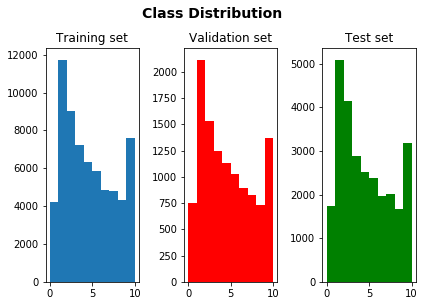

In [9]:
plot_distribution(y_train, y_val, y_test)

<h1>2) Change X data to (num_images, 224, 224, 3)</h1>

In [10]:
num_train = X_train.shape[0]
X_train_resized = np.zeros((num_train, 224, 224, 3), dtype='uint8')

for i in range(X_train.shape[0]):
    img = X_train[i, :, :, 0]
    img_resized = cv2.resize(img, (224, 224))
    X_train_resized[i,:,:,0] = img_resized
    X_train_resized[i,:,:,1] = img_resized
    X_train_resized[i,:,:,2] = img_resized

# X_train_resized = X_train_resized.astype('float32')
print('X_train_resized.shape:', X_train_resized.shape)

X_train_resized.shape: (65932, 224, 224, 3)


In [11]:
num_val = X_val.shape[0]
X_val_resized = np.zeros((num_val, 224, 224, 3), dtype='uint8')

for i in range(X_val.shape[0]):
    img = X_val[i, :, :, 0]
    img_resized = cv2.resize(img, (224, 224))
    X_val_resized[i,:,:,0] = img_resized
    X_val_resized[i,:,:,1] = img_resized
    X_val_resized[i,:,:,2] = img_resized

# X_val_resized = X_val_resized.astype('float32')
print('X_val_resized.shape:', X_val_resized.shape)

X_val_resized.shape: (11635, 224, 224, 3)


In [12]:
num_test = X_test.shape[0]
X_test_resized = np.zeros((num_test, 224, 224, 3), dtype='uint8')

for i in range(X_test.shape[0]):
    img = X_test[i, :, :, 0]
    img_resized = cv2.resize(img, (224, 224))
    X_test_resized[i,:,:,0] = img_resized
    X_test_resized[i,:,:,1] = img_resized
    X_test_resized[i,:,:,2] = img_resized

# X_test_resized = X_test_resized.astype('float32')
print('X_test_resized.shape:', X_test_resized.shape)

X_test_resized.shape: (27627, 224, 224, 3)


<h1>3) Cut datasets</h1>

In [13]:
# train_size = 500
# val_size = 100
# test_size = 100

In [14]:
train_size = int(X_train_resized.shape[0]/5)
val_size = int(X_val_resized.shape[0]/5)
test_size = int(X_test_resized.shape[0]/5)

In [33]:
X_train_resized_cut = X_train_resized[:train_size, :, :, :]
X_val_resized_cut = X_val_resized[:val_size, :, :, :]
X_test_resized_cut = X_test_resized[test_size*4:test_size*5, :, :, :]

y_train_cut = y_train[:train_size]
y_val_cut = y_val[:val_size]
y_test_cut = y_test[test_size*4:test_size*5]

In [34]:
print('X_train: {}, y_train: {}, labels: {}'.format(X_train_resized_cut.shape, y_train_cut.shape, np.unique(y_train_cut)))
print('X_val: {}, y_val: {}, labels: {}'.format(X_val_resized_cut.shape, y_val_cut.shape, np.unique(y_val_cut)))
print('X_test: {}, y_test: {}, labels: {}'.format(X_test_resized_cut.shape, y_test_cut.shape, np.unique(y_test_cut)))

X_train: (13186, 224, 224, 3), y_train: (13186,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_val: (2327, 224, 224, 3), y_val: (2327,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_test: (5525, 224, 224, 3), y_test: (5525,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]


<h1>4) Build VGG16 model</h1>

In [43]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [15]:
%%capture
loss, acc = model.evaluate(X_test_resized_cut, y_test_cut)

KeyboardInterrupt: 

In [16]:
print('Untrained model accuracy: {}%'.format(round(acc*100, 2)))

NameError: name 'acc' is not defined

<h1>5) Train VGG16 model</h1>

In [30]:
history = model.fit(x=X_train_resized_cut, 
                    y=y_train_cut, 
                    batch_size=50, 
                    epochs=5, 
                    verbose=1, 
                    validation_data=(X_val_resized_cut, y_val_cut))
# if val_acc < train_acc = model_overfitting, if val_acc > train_acc = model_underfitting, 

Train on 13186 samples, validate on 2327 samples
Epoch 1/5
13186/13186 [==============================] - 2142s 162ms/sample - loss: 1.1756 - accuracy: 0.6177 - val_loss: 1.1358 - val_accuracy: 0.6274
Epoch 2/5
13186/13186 [==============================] - 2139s 162ms/sample - loss: 1.0320 - accuracy: 0.6597 - val_loss: 1.0722 - val_accuracy: 0.6566
Epoch 3/5
13186/13186 [==============================] - 2133s 162ms/sample - loss: 0.9304 - accuracy: 0.6981 - val_loss: 1.0460 - val_accuracy: 0.6648
Epoch 4/5
13186/13186 [==============================] - 2136s 162ms/sample - loss: 0.8536 - accuracy: 0.7223 - val_loss: 1.0567 - val_accuracy: 0.6738
Epoch 5/5
13186/13186 [==============================] - 2164s 164ms/sample - loss: 0.7918 - accuracy: 0.7390 - val_loss: 0.9899 - val_accuracy: 0.6854


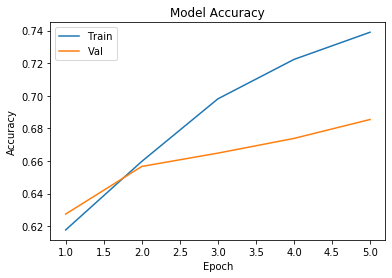

In [31]:
epoch_range = range(1, 6)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<h1>5) Save model and model weights</h1>

In [32]:
model.save('VGG_trained_models/VGG_model.h5')

In [33]:
# new_model = tf.keras.models.load_model('my_model.h5')
# new_model.summary

# %%capture
# loss, acc = new_model.evaluate(X_test, y_test)

# print('new_model accuracy: {}%'.format(round(acc*100, 2)))

In [34]:
model.save_weights('VGG_trained_models/VGG_weights')

In [35]:
new_model = create_model()

In [ ]:
%%capture
loss, acc = new_model.evaluate(X_test_resized_cut, y_test_cut)

In [ ]:
print('new_model accuracy: {}%'.format(round(acc*100, 2)))

In [36]:
%%capture
new_model.load_weights('VGG_trained_models/VGG_weights')
loss, acc = new_model.evaluate(X_test_resized_cut, y_test_cut)

In [37]:
print('pre-trained_model accuracy: {}%'.format(round(acc*100, 2)))

pre-trained_model accuracy: 69.29%


<h1>6) Test VGG model</h1>

In [39]:
y_pred = model.predict_classes(x=X_test_resized_cut.astype('float32'))

In [40]:
print('y_test:', y_test_cut)
print('y_pred:', y_pred)

correct_answers = np.sum(y_test_cut == y_pred)
total = y_test_cut.shape[0]
per_correct = (correct_answers/total)*100
print('per_correct: {}%'.format(round(per_correct, 2)))

y_test: [ 3  1  5 ... 10 10 10]
y_pred: [ 9  4  3 ... 10  1  4]
per_correct: 69.29%


In [41]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23c01097dc8>)

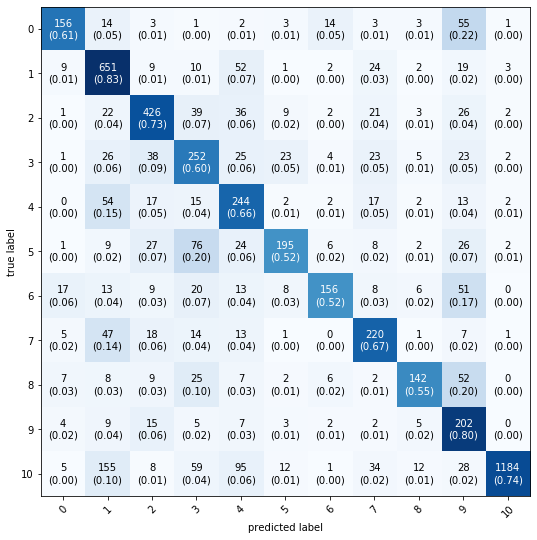

In [42]:
mat = confusion_matrix(y_test_cut, y_pred)
plot_confusion_matrix(mat, figsize=(9, 9), class_names=np.arange(0, 11), show_normed=True)